In [ ]:
# link to this colab notebook: https://colab.research.google.com/drive/1fNm2P2u3KlwA-qFbIwZ3ningsNJb2Rj4?authuser=1#scrollTo=wABtdFx-p3i3

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from keras.layers.normalization import BatchNormalization
from keras.models import Model, Sequential
from keras.applications.xception import Xception
from keras.applications import *
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from PIL import Image
import random
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier 
from keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.decomposition import PCA

In [ ]:
!pip install efficientnet

     |████████████████████████████████| 51kB 4.0MB/s 


In [ ]:
import keras 
from keras import applications, metrics, layers, models, regularizers, optimizers
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.models import Model, Sequential
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications import *
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications import EfficientNetB4

In [ ]:
'''try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print("Running on TPU ", tpu.cluster_spec().as_dict()["worker"])
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
    print("Not connected to a TPU runtime. Using CPU/GPU strategy")
    strategy = tf.distribute.MirroredStrategy()'''

'try:\n    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection\n    print("Running on TPU ", tpu.cluster_spec().as_dict()["worker"])\n    tf.config.experimental_connect_to_cluster(tpu)\n    tf.tpu.experimental.initialize_tpu_system(tpu)\n    strategy = tf.distribute.experimental.TPUStrategy(tpu)\nexcept ValueError:\n    print("Not connected to a TPU runtime. Using CPU/GPU strategy")\n    strategy = tf.distribute.MirroredStrategy()'

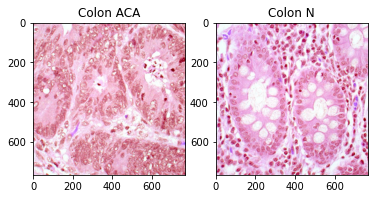

In [ ]:
colon_aca =  "/content/drive/MyDrive/colon_image_sets/colon_aca/"

plt.subplot(121)
img = cv2.imread(colon_aca + os.listdir(colon_aca)[0])
plt.title('Colon ACA')
plt.imshow(img)

plt.subplot(122)
colon_n = "/content/drive/MyDrive/colon_image_sets/colon_n/"
img = cv2.imread(colon_n + os.listdir(colon_n)[0])
plt.title('Colon N')
plt.imshow(img)
plt.show()

In [ ]:
data_dir = "/content/drive/MyDrive/colon_image_sets/"
SIZE_X = SIZE_Y = 128

datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.1)

train_it = datagen.flow_from_directory(data_dir,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X,SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 4, 
                                       shuffle = True,
                                       subset='training',
                                       seed = 42)

validate_it = datagen.flow_from_directory(data_dir,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X, SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 4, 
                                       shuffle = False,
                                       subset='validation',
                                       seed = 42)

Found 9022 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.


In [ ]:

'''base_model = EfficientNetB4(include_top=False, input_shape=(SIZE_X, SIZE_Y, 3), weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False
                   
model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)
model.summary() '''

"base_model = EfficientNetB4(include_top=False, input_shape=(SIZE_X, SIZE_Y, 3), weights='imagenet')\n\nfor layer in base_model.layers:\n    layer.trainable = False\n                   \nmodel = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)\nmodel.summary() "

In [ ]:
# X_train, X_val, X_test, y_train, y_val, y_test = get_features(model, train_it, validate_it)

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        preprocessing.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

In [ ]:
from tensorflow.keras.applications import EfficientNetB3
IMG_SIZE = 300

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = img_augmentation(inputs)
outputs = EfficientNetB3(include_top=True, weights=None, classes=2)(x)
model = tf.keras.Model(inputs, outputs)
model.compile( optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()  


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
img_augmentation (Sequential (None, 300, 300, 3)       0         
_________________________________________________________________
efficientnetb3 (Functional)  (None, 2)                 10786609  
Total params: 10,786,609
Trainable params: 10,699,306
Non-trainable params: 87,303
_________________________________________________________________


In [ ]:
epochs = 15  
hist = model.fit(train_it, epochs=epochs, validation_data=validate_it, verbose=2,)

Epoch 1/15
2256/2256 - 3162s - loss: 1.1629 - accuracy: 0.6863 - val_loss: 82.3218 - val_accuracy: 0.5050
Epoch 2/15
2256/2256 - 173s - loss: 0.6238 - accuracy: 0.7699 - val_loss: 4.2094 - val_accuracy: 0.7854
Epoch 3/15
2256/2256 - 173s - loss: 0.4705 - accuracy: 0.8368 - val_loss: 1.9091 - val_accuracy: 0.4990
Epoch 4/15
2256/2256 - 174s - loss: 0.3317 - accuracy: 0.8967 - val_loss: 0.3291 - val_accuracy: 0.8752
Epoch 5/15
2256/2256 - 171s - loss: 0.1920 - accuracy: 0.9469 - val_loss: 0.2555 - val_accuracy: 0.9022
Epoch 6/15
2256/2256 - 170s - loss: 0.1085 - accuracy: 0.9676 - val_loss: 0.0387 - val_accuracy: 0.9900
Epoch 7/15
2256/2256 - 171s - loss: 0.0746 - accuracy: 0.9792 - val_loss: 0.0144 - val_accuracy: 0.9940
Epoch 8/15
2256/2256 - 170s - loss: 0.0512 - accuracy: 0.9861 - val_loss: 0.4347 - val_accuracy: 0.8074
Epoch 9/15
2256/2256 - 170s - loss: 0.0516 - accuracy: 0.9859 - val_loss: 0.5984 - val_accuracy: 0.8144
Epoch 10/15
2256/2256 - 170s - loss: 0.0459 - accuracy: 0.9886

In [ ]:
model.save('colon_B3.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
print(validate_it)

In [ ]:
y_true = validate_it.classes

In [ ]:
y_true

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/colon_B3.h5') 

In [ ]:
validate_it.reset()
from tensorflow.keras.models import load_model
saved_model = new_model
y_pred= saved_model.predict_generator(validate_it)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
import sklearn 

In [ ]:
predicted = y_pred.flatten()

In [ ]:
y_pred

array([[1.0000000e+00, 3.8261664e-08],
       [9.9958616e-01, 4.1379410e-04],
       [9.9999654e-01, 3.4122288e-06],
       ...,
       [1.4621508e-05, 9.9998534e-01],
       [8.6073487e-06, 9.9999142e-01],
       [2.1513304e-05, 9.9997854e-01]], dtype=float32)

In [ ]:
b_del = np.delete(y_pred, 0, 1)

In [ ]:
b_del

array([[3.8261664e-08],
       [4.1379410e-04],
       [3.4122288e-06],
       ...,
       [9.9998534e-01],
       [9.9999142e-01],
       [9.9997854e-01]], dtype=float32)

In [ ]:
predicted

array([1.0000000e+00, 3.8261664e-08, 9.9958616e-01, ..., 9.9999142e-01,
       2.1513304e-05, 9.9997854e-01], dtype=float32)

In [ ]:
test=y_true.astype('float32')
test

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

In [ ]:

acc_pred = tf.math.round(b_del)
acc_pred

<tf.Tensor: shape=(1002, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
from sklearn import metrics
print(metrics.classification_report(test, acc_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       500
         1.0       0.97      1.00      0.99       502

    accuracy                           0.99      1002
   macro avg       0.99      0.99      0.99      1002
weighted avg       0.99      0.99      0.99      1002



In [ ]:
!pip install tensorflowjs
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(new_model, '/content/drive/MyDrive/Colon Efficientnet B3')


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


weight normalization/count with shape () and dtype int64 was auto converted to the type int32


[[0.24245492 0.75754505]]


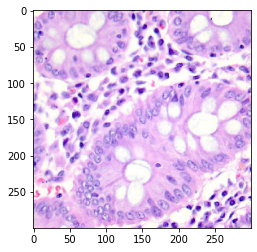

In [ ]:
from keras.preprocessing import image
import numpy as np

img = image.load_img("/content/drive/MyDrive/Colon_Testset_/val/colon_n/colonn28.jpeg",target_size=(300,300))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

from tensorflow.keras.models import load_model
saved_model = load_model("colon_B3.h5")
output = saved_model.predict(img)
print(output)

In [ ]:
print(len(y_pred))


1002


<tf.Tensor: shape=(), dtype=int32, numpy=2004>

In [ ]:
import pandas as pd 
filenames=validate_it.filenames
results=pd.DataFrame({"Filename":filenames,
                      })
'''csvwrite('y_pred',y_pred.)
df = pd.DataFrame.from_dict(results, orient='index')
df = df.transpose()'''
results.to_csv("/content/drive/MyDrive/result_colon_B3_Filename.csv",index=False)

In [ ]:
import numpy as np
np.savetxt("results_B3_1.csv", y_pred, delimiter=",")